In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Котосов А.Э.,  БПМ-171, вариант №10

### $$№1.1.10$$

Дан ряд $\sum\limits_{n=0}^\infty \frac{84}{13(n^2+14n+48)}$. Найти сумму ряда аналитически. Вычислить значения частичных сумм ряда $S_N = \sum\limits_{n=0}^N \frac{84}{13(n^2+14n+48)}$ и найти величину погрешности при значениях $N = 10, 10^2, 10^3, 10^4, 10^5$. 

#### Аналитическое решение.
$$S_N = \sum\limits_{n=0}^N \frac{84}{13(n^2+14n+48)} = \sum\limits_{n=0}^N \frac{84}{13(n+8)(n+6)} = 
\frac{84}{13}(-\frac{1}{2(N+8)}-\frac{1}{2(N+7)}+\frac{13}{84}) $$  
$$S = \lim_{N->\infty}S_N = 1$$

In [2]:
S = 1
def S_N(N):
    sum = 0
    for n in range(N+1):
        sum += 84/(13*(n**2+14*n+48))
    return sum
def d(N):
    return abs(S_N(N) - S)

In [3]:
for i in [10,100,1000,10000,int(1e5)]:
    print("S({:d}) = {:f} \t d({:d}) = {:f}".format(i,S_N(i),i,d(i))) 

S(10) = 0.630468 	 d(10) = 0.369532
S(100) = 0.939891 	 d(100) = 0.060109
S(1000) = 0.993587 	 d(1000) = 0.006413
S(10000) = 0.999354 	 d(10000) = 0.000646
S(100000) = 0.999935 	 d(100000) = 0.000065


Соответствуюшие M (число верных цифр) = $1,2,3,4,5$.

Построим соответствующую гистограмму.

[0 1 2 3 4]


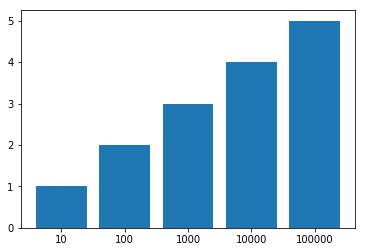

In [4]:
a = np.arange(5)
print(a)
plt.bar(a,height=[1,2,3,4,5])
plt.xticks(a, [10,100,1000,10000,int(1e5)])
plt.show()

Увеличение числа членов ряда в 10 раз по сравнению с предыдущим случаем увеличивает число верных цифр в ответе на 1

### $$№1.3.3$$

Для заданной матрицы A найти обратную матрицу (если это возможно). Затем в элемент a11 внести погрешность в 10% и снова найти обратную матрицу. Объяснить полученные результаты.
$$A = \begin{pmatrix}
  3& 5& 3\\
  9& 15& 9\\
  6& 7& 2
\end{pmatrix}$$

In [5]:
A = np.array([[3.,5.,3.], [9.,15.,9.], [6.,7.,2.]])
print("Deter =",np.linalg.det(A))

Deter = 5.495603971894542e-15


Соответственно, определитель нашей исходной матрицы равен нулю, соответственно, она вырождена и необратима.
Внесём теперь погрешность в элемент $a_{11}$.

In [6]:
A[0][0] = A[0][0] + A[0][0] * 0.1
print(A)
print("Deter =", np.linalg.det(A))

[[ 3.3  5.   3. ]
 [ 9.  15.   9. ]
 [ 6.   7.   2. ]]
Deter = -9.899999999999997


Теперб определитель не равен нулю, соответственно мы можем найти обратную матрицу.

In [7]:
B = np.linalg.inv(A)
print(B)

[[ 3.33333333e+00 -1.11111111e+00  1.17190208e-16]
 [-3.63636364e+00  1.15151515e+00  2.72727273e-01]
 [ 2.72727273e+00 -6.96969697e-01 -4.54545455e-01]]


In [8]:
print(A@B)

[[ 1.00000000e+00  2.22044605e-16  1.66533454e-16]
 [-1.33226763e-15  1.00000000e+00  5.55111512e-17]
 [-2.66453526e-15 -4.44089210e-16  1.00000000e+00]]


Таким образом, матрица имела определитель, равный нулю и была необратимой. После внесения абсолютной погрешности определитель стал отличным от нуля и нахождение обратной матрицы стало возможным

### $$№1.7$$

Вычислить значения машинного нуля, машинной бесконечности, машинного эпсилон в режимах одинарной и двойной точности на алгоритмическом языке. Сравнить результаты с результатами задачи 1.6. 

In [9]:
def machineEpsilon(func):
    fepsilon = func(1)
    while (func(1) + func(fepsilon) != func(1)):
        fepsilon = func(fepsilon) / func(2)
    return fepsilon

In [10]:
print("Машинный эпсилон для двойной точности",machineEpsilon(float))
print("Машинный эпсилон для одинарной точности",machineEpsilon(np.float32))

Машинный эпсилон для двойной точности 1.1102230246251565e-16
Машинный эпсилон для одинарной точности 5.9604645e-08


In [11]:
def machineZero(func):
    a = func(1)
    k = 0
    while (func(a) != func(0)):
        a = func(a) / func(2)
        k = k - 1
    return k

In [12]:
print("Машинный ноль для двойной точности ",2**machineZero(float))
print("Машинный ноль для одинарной точности ",2**machineZero(np.float32))

Машинный ноль для двойной точности  5e-324
Машинный ноль для одинарной точности  7.006492321624085e-46


In [13]:
def machine_continium(func):
    a = func(1)
    a_prev = func(0)
    dict = []
    while func(a_prev) != func(a):
        dict.append(a)
        a_prev = func(a)
        a = func(a) * 2
    return dict[-2]

In [14]:
print("Машинная бесконечность для двойной точности ",machine_continium(float))
print("Машинная бесконечность для одинарной точности ",machine_continium(np.float32))

Машинная бесконечность для двойной точности  8.98846567431158e+307
Машинная бесконечность для одинарной точности  1.7014118346046923e+38


Сравнивая полученные результаты с результатами 1.6 можно сделать следующие выводы:
- Машинная бесконечность совпадает для случая двойной точности
- Машинный ноль и эпсилон значительно меньше в пакете Маткад

### $$№1.6$$

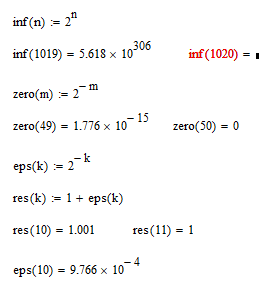

Машинная бесконечность $\approx 10^{307}$ (как $2^{1020}$)

Машинный нуль $\approx 10^{-16}$ (как $2^{-50}$)

Машинное эпсилон $\approx 10^{-4}$ (как $2^{-10}$)

### $$№1.9.4$$

Для матрицы A решить вопрос о существовании обратной матрицы в следующих случаях:

1) элементы матрицы заданы точно;

2) элементы матрицы заданы приближенно с относительной погрешностью a) δ = α % и b) δ = β %. Найти относительную погрешность результата.

$$A = \begin{pmatrix}
  9& 5& 6\\
  13.5& 9.5& 11\\
  8& 4& 5
\end{pmatrix} , \alpha=0.1,   \beta=0.5$$

In [85]:
A = np.array([[9.,5.,6.], [13.5,9.5,11], [8.,4.,5.]])
alpha = 0.1
beta = 0.5
print("Deter =",np.linalg.det(A))

Deter = 2.000000000000001


Определитель не равен 0, соответственно, матрица обратима.

In [89]:
B = np.linalg.inv(A)
print(B)

[[  1.75  -0.5   -1.  ]
 [ 10.25  -1.5   -9.  ]
 [-11.     2.     9.  ]]


In [87]:
print(A@B)

[[ 1.00000000e+00  1.33226763e-15 -3.55271368e-15]
 [ 3.55271368e-15  1.00000000e+00  1.77635684e-15]
 [ 3.55271368e-15 -6.66133815e-16  1.00000000e+00]]


Исходя из предположений из приложения 1.C найдём max и min определителя (он в данном случае является функцией). Эти значения достигаются в точках, координаты которых имеют вид $a_{ij}( 1 ± δ )$.Таких
точек $2^9 = 512$.В каждой из них следует вычислить определитель, а затем выбрать из полученных значений самое большое и самое маленькое.Это и будут числа $max(M)$ и $min(m)$.

In [122]:
def find_max_min(A, alph):
    deter = []
    for i in range(512):
        binnumb = '{0:09b}'.format(i)
        
        buf = np.zeros(9)
        cnumb = 0
        
        for i in binnumb:
            if i == '1':
                buf[cnumb] = 1
            else:
                buf[cnumb] = -1
            cnumb+=1
        buf = buf.reshape(3,3) 
        
        B = A + buf*alph*A
        deter.append(np.linalg.det(B))
    return max(deter),min(deter)

In [123]:
find_max_min(A, alpha)

(95.47299999999998, -82.50600000000001)

In [124]:
find_max_min(A, beta)

(1630.1249999999989, -1577.2499999999993)

В обоих случаях $0$ попал в отрезок $[m,M]$, то есть мы имеем неопределённость относительно обратимости матрицы.

Найдём относительную погрешность для первого интервала (первого значения δ).

$\Delta_1$ = |95.473 - 2| = 93.473

$\Delta_2$ = |-82.506 - 2| = 84.506

Берём верхнюю оценку, соответсвенно относительная погрешность для $\alpha = 0.1 \%$ равна $\delta = \frac{\Delta_1}{|A|} =
\frac{93.473}{2} = 46.74$

Найдём относительную погрешность для второго интервала (второго значения δ).

$\Delta_1$ = |1630.13 - 2| = 1628.13

$\Delta_2$ = |-1577.25 - 2| = 1579.25

Берём верхнюю оценку, соответсвенно относительная погрешность для $\alpha = 0.5 \%$ равна $\delta = \frac{\Delta_1}{|A|} =
\frac{1628.13}{2} = 814$